Reproducing figures from CCC's report

In [44]:
#!pip3 install pandas
#!pip3 install matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#import sys
#sys.version

'3.10.6 (v3.10.6:9c7b4bd164, Aug  1 2022, 17:13:48) [Clang 13.0.0 (clang-1300.0.29.30)]'

Load emissions data

In [2]:
climate_report = pd.read_pickle('./data/climate-report-summary-202207.pkl')

In [3]:
climate_report

,0,1,2,3,4,5,6,7,8,9,...,88,89,90,91,92,93,94,95,96,97
Scope,1,1,1,1,1,1,1,1,1,1,...,Outside of scopes,3,3,3,3,3,3,3,3,3
Category,Buildings & utilities,Buildings & utilities,Buildings & utilities,Buildings & utilities,Buildings & utilities,Buildings & utilities,Transport,Transport,Transport,Transport,...,Waste,Waste,Construction materials,Highways materials,Other,Other,Agriculture,Agriculture,"""Land use, land use change and forestry""","""Land use, land use change and forestry"""
Sub-category,Gas,Oil,Diesel,Refrigerant gases,Refrigerant gases,Refrigerant gases,Business travel,Business travel,Social and education transport,Business travel,...,County waste disposal - landfill,Highways waste,Construction / building works materials,Highways materials,IT hardware,Paper,Livestock farming,Arable farming,CO2 emissions from LULUCF,CO2 removals from LULUCF
Activity / aspect,Gas - CCC sites,Oil (heating oil) - CCC sites,Diesel (for generators),Refrigerant gases: R32 air con,Refrigerant gases: R407C air con,Refrigerant gases: R410A air con,"""Passenger vehicles (pool cars - small car, pe...","""Passenger vehicles (pool cars -small car, hyb...",Passenger vehicles: social and educational tra...,Fuel purchased on fuelcards for all other flee...,...,Waste treatment for Cambs waste,Tonnes of waste OR tCO2e,Material use,Material use,Items purchased from Dell,,County farms - livestock,County farms - cropland,"""Land owned - cropland, wetlands and settlements""",Land owned - forestland and grassland
Data,Gas purchased for CCC buildings,Oil purchased for CCC buildings,Diesel purchased for generators at CCC buildings,Top up gases for air con units - gas R32,Top up gases for air con units - gas R407C,Top up gases for air con units - gas R410A,Miles travelled (only for vehicles where fuel ...,Miles travelled (only for vehicles where fuel ...,fuel used by passenger transport / minibuses (...,Diesel,...,CO2 emissions from landfill gas (biogenic carbon),,"""various - materials purchased template - Quan...",various - materials purchased,Carbon footprint info from supplier combined w...,Paper and board: paper (from primary sources) ...,Farm types and number of animals.,Area of land owned and proportions what used for,Area of land owned and proportions what used for,Area of land owned and proportions what used for
2020-21 Value,6357552.0,248635.0,N/A,N/A,N/A,11.0,11396.0,640.0,13398.0,46239.0,...,N/A,26.0,4979.0,11980.0,N/A,N/A,324.0,14187.0,25500.0,-1009.0
Unit,kWh (Gross CV),kWh (Gross CV),litres,kg,kg,kg,miles,miles,litres,litres,...,,tCO2e,tCO2e,tCO2e,units,tonnes,kg CO2e,kg CO2e,Tonnes CO2e,Tonnes CO2e
2020 Carbon conversion factor (to convert to kg CO2e) (see Notes),0.18387,0.24666,2.54603,675.0,1774.0,2088.0,0.23877,0.16538,2.54603,2.54603,...,N/A,1000.0,1000.0,1000.0,N/A,N/A,1000.0,1000.0,1000.0,1000.0
Gross Carbon Footprint (tonnes CO2e),1168.96,61.33,N/A,N/A,N/A,23.55,2.72,0.11,34.11,117.73,...,N/A,26.1,4978.73,11979.79,N/A,N/A,323.83,14186.88,25499.75,-1009.4
Data source,Energy data,Energy data,Invoices?,Air con service reports,Air con service reports,Air con service reports,Pool cars MI reports from Enterprise,Pool cars MI reports from Enterprise,,Fuelcard reports,...,,,,Milestone report,,,,,,


Get emissions row of data, set 'N/A' to NaN and sum to find total annual emissions

In [4]:
emiss = climate_report.iloc[8,:]
emiss[emiss == 'N/A'] = np.nan
tot_emiss = np.sum(emiss)

Find the categories of emissions

In [5]:
categories = set(climate_report.iloc[1,:])
categories = list(categories)
categories

['Waste',
 'Transport',
 'Agriculture',
 'Other',
 'Construction materials',
 'Highways materials',
 'Schools (maintained)',
 '"Land use, land use change and forestry"',
 'Buildings & utilities']

Transpose climate report data to be easier to index

In [6]:
climate_report = climate_report.transpose()
climate_report

,Scope,Category,Sub-category,Activity / aspect,Data,2020-21 Value,Unit,2020 Carbon conversion factor (to convert to kg CO2e) (see Notes),Gross Carbon Footprint (tonnes CO2e),Data source,Data owner,Current status
0,1,Buildings & utilities,Gas,Gas - CCC sites,Gas purchased for CCC buildings,6357552.0,kWh (Gross CV),0.18387,1168.96,Energy data,EIU,Got
1,1,Buildings & utilities,Oil,Oil (heating oil) - CCC sites,Oil purchased for CCC buildings,248635.0,kWh (Gross CV),0.24666,61.33,Energy data,Property,Got
2,1,Buildings & utilities,Diesel,Diesel (for generators),Diesel purchased for generators at CCC buildings,N/A,litres,2.54603,NaN,Invoices?,Property,Missing
3,1,Buildings & utilities,Refrigerant gases,Refrigerant gases: R32 air con,Top up gases for air con units - gas R32,N/A,kg,675.0,NaN,Air con service reports,Property,Estimated
4,1,Buildings & utilities,Refrigerant gases,Refrigerant gases: R407C air con,Top up gases for air con units - gas R407C,N/A,kg,1774.0,NaN,Air con service reports,Property,Estimated
...,...,...,...,...,...,...,...,...,...,...,...,...
93,3,Other,Paper,,Paper and board: paper (from primary sources) ...,N/A,tonnes,N/A,NaN,,,Missing
94,3,Agriculture,Livestock farming,County farms - livestock,Farm types and number of animals.,324.0,kg CO2e,1000.0,323.83,,Rural Estates,Got
95,3,Agriculture,Arable farming,County farms - cropland,Area of land owned and proportions what used for,14187.0,kg CO2e,1000.0,14186.88,,Rural Estates,Got
96,3,"""Land use, land use change and forestry""",CO2 emissions from LULUCF,"""Land owned - cropland, wetlands and settlements""",Area of land owned and proportions what used for,25500.0,Tonnes CO2e,1000.0,25499.75,,Strategic assets + Rural estates,Got


We can now isolate parts of the data by emission category

In [9]:
climate_report[climate_report['Category'].isin(['Agriculture'])]

,Scope,Category,Sub-category,Activity / aspect,Data,2020-21 Value,Unit,2020 Carbon conversion factor (to convert to kg CO2e) (see Notes),Gross Carbon Footprint (tonnes CO2e),Data source,Data owner,Current status
94,3,Agriculture,Livestock farming,County farms - livestock,Farm types and number of animals.,324.0,kg CO2e,1000.0,323.83,,Rural Estates,Got
95,3,Agriculture,Arable farming,County farms - cropland,Area of land owned and proportions what used for,14187.0,kg CO2e,1000.0,14186.88,,Rural Estates,Got


In [38]:
emiss_cat = np.zeros([len(categories),1])
i = 0
for cat in categories: 
    emiss_cat[i] = np.sum(climate_report[climate_report['Category'].isin([cat])].iloc[:,8])
    i = i+1
print(emiss_cat)

[[39320.32]
 [ 4218.23]
 [14510.71]
 [    0.  ]
 [ 4978.73]
 [11979.79]
 [ 7397.16]
 [24490.35]
 [ 6887.34]]


Plot a pie chart of emissions by category

([<matplotlib.patches.Wedge at 0x1298e7a00>,
 [Text(0.5129688555962553, 0.973068832708287, 'Waste'),
  Text(-0.7228195428025361, 0.829175438940839, 'Transport'),
  Text(-1.0382333211536532, 0.3634165252795414, 'Agriculture'),
  Text(-1.0977519851919564, -0.07028925242964902, 'Other'),
  Text(-1.0777644690202475, -0.22005396910190936, 'Construction materials'),
  Text(-0.8624491228341353, -0.6827748607869439, 'Highways materials'),
  Text(-0.3938242577868951, -1.0270844434507813, 'Schools (maintained)'),
  Text(0.5410995747299548, -0.9577114650180722, '"Land use, land use change and forestry"'),
  Text(1.0801708498613296, -0.20792050189880962, 'Buildings & utilities')],
 [Text(0.27980119396159375, 0.5307648178408838, '34.6%'),
  Text(-0.39426520516501967, 0.4522775121495485, '3.7%'),
  Text(-0.5663090842656289, 0.19822719560702254, '12.8%'),
  Text(-0.5987738101047034, -0.03833959223435401, '0.0%'),
  Text(-0.5878715285564986, -0.12002943769195054, '4.4%'),
  Text(-0.4704267942731647, -

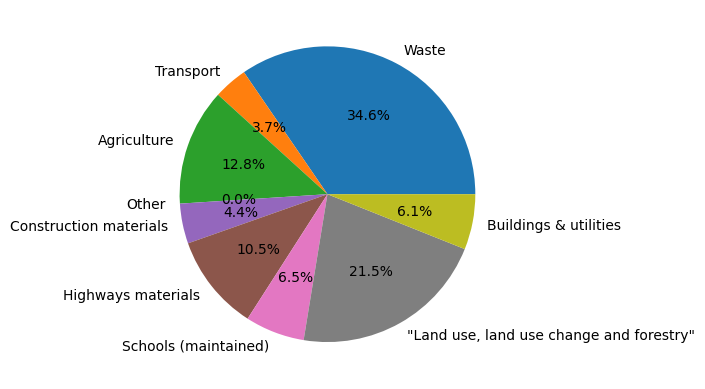

In [48]:
plt.pie(emiss_cat[:,0]/tot_emiss, labels=categories, autopct='%1.1f%%')